___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras

# import warnings
# warnings.filterwarnings("ignore")
# warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10, 6)

sns.set_style("whitegrid")
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option("display.max_columns", None)
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam


In [2]:
SEED = 42
keras.utils.set_random_seed(SEED)
tf.config.experimental.enable_op_determinism()

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [3]:
from tensorflow.keras.datasets import fashion_mnist

In [4]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [5]:
X_train_v, X_val, y_train_v, y_val = train_test_split(x_train, 
                                                      y_train, 
                                                      test_size = 0.1, 
                                                      stratify = y_train)

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
x_test.shape

(10000, 28, 28)

In [8]:
X_train_v.shape

(54000, 28, 28)

In [9]:
X_val.shape

(6000, 28, 28)

In [10]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [11]:
x_test

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [12]:
X_val

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [13]:
X_train_v

array([[[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0, 142, ..., 148,   0,   0],
        [  0,   0, 140, ..., 165,   0,   0],
        [  0,   0,  53, ...,  47,   0,   0]],

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       ...,

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0

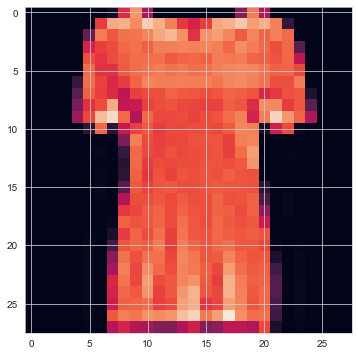

In [14]:
plt.imshow(x_train[10])
plt.show()

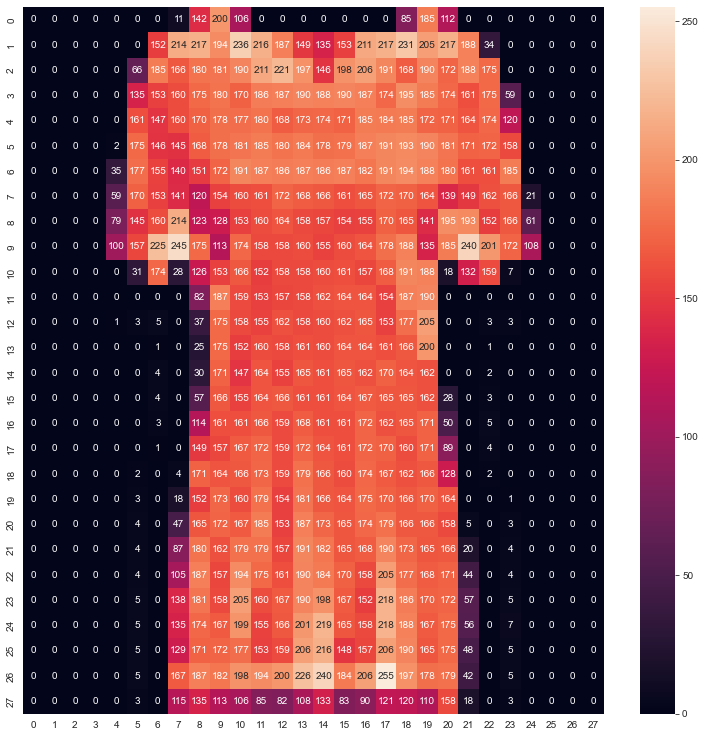

In [15]:
plt.figure(figsize=(13, 13))
sns.heatmap(x_train[10], annot=True, fmt=".3g");

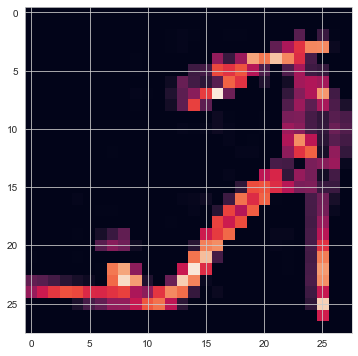

In [16]:
plt.imshow(x_train[8])
plt.show()

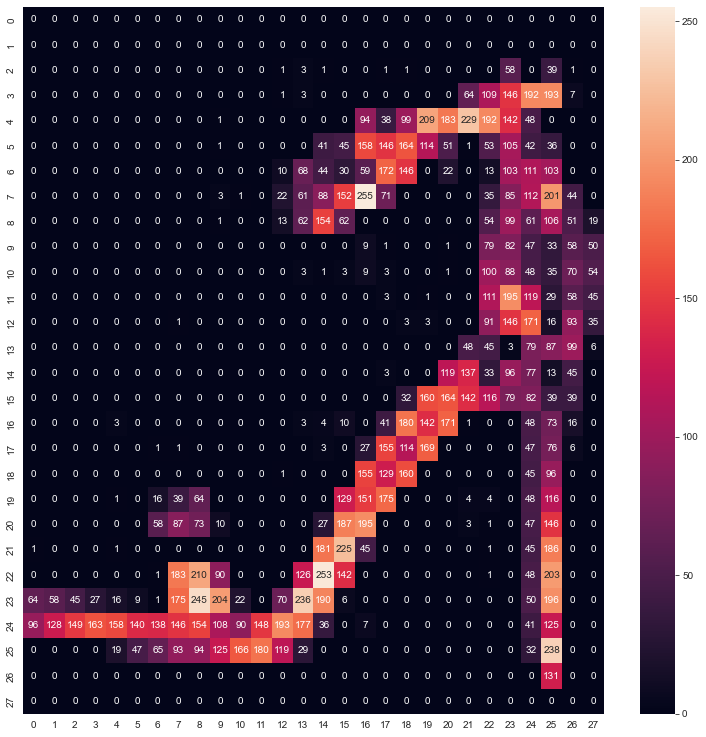

In [17]:
plt.figure(figsize=(13, 13))
sns.heatmap(x_train[8], annot=True, fmt=".3g");

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [18]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [19]:
y_train[45]

2

In [20]:
classes[y_train[45]]

'Pullover'

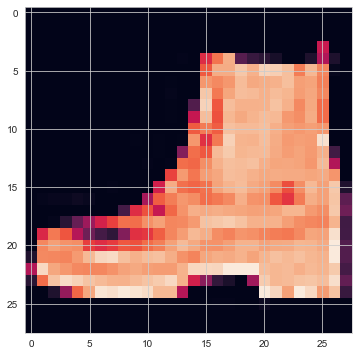

In [21]:
plt.imshow(X_train_v[1])
plt.show()

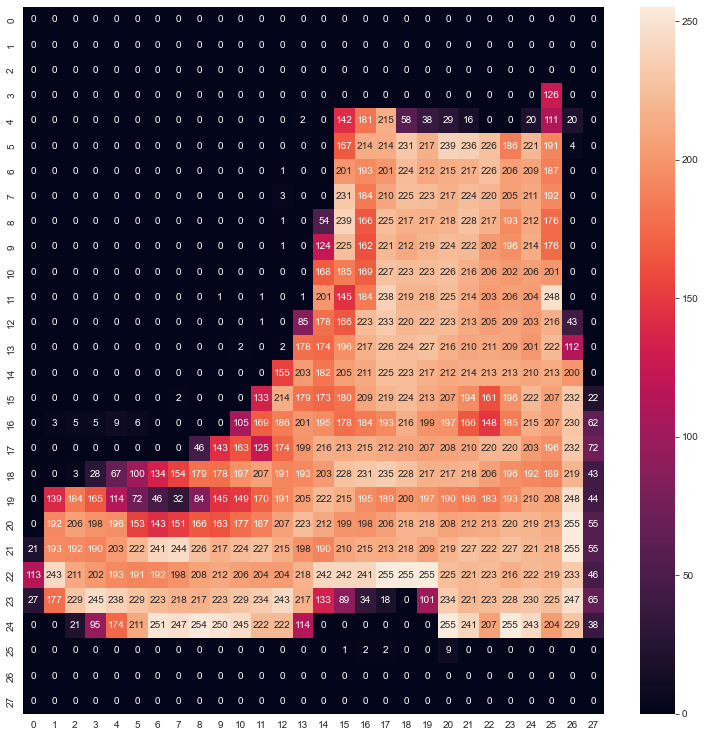

In [22]:
plt.figure(figsize=(13, 13))
sns.heatmap(X_train_v[1], annot=True, fmt=".3g");

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [23]:
x_train.max()

255

In [24]:
x_test.max()

255

In [25]:
X_train_v.max()

255

In [26]:
X_val.max()

255

In [27]:
X_train = x_train.astype("float32")
X_test = x_test.astype("float32")
X_train /= 255
X_test /= 255

In [28]:
X_train_v = X_train_v.astype("float32")
X_val = X_val.astype("float32")
X_train_v /= 255
X_val /= 255

In [29]:
X_train.max()

1.0

In [30]:
X_test.max()

1.0

In [31]:
X_train_v.max()

1.0

In [32]:
X_val.max()

1.0

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [33]:
X_train_vs = np.expand_dims(X_train_v, -1)
X_val_s = np.expand_dims(X_val, -1)

In [34]:
X_train_s = np.expand_dims(X_train, -1)
X_test_s = np.expand_dims(X_test, -1)

In [35]:
X_train_vs.shape

(54000, 28, 28, 1)

In [36]:
X_val_s.shape

(6000, 28, 28, 1)

In [37]:
X_train_s.shape

(60000, 28, 28, 1)

In [38]:
X_test_s.shape

(10000, 28, 28, 1)

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [39]:
from tensorflow.keras.utils import to_categorical

In [40]:
y_train_vc = to_categorical(y_train_v)
y_val_vc = to_categorical(y_val)

In [41]:
y_train_c = to_categorical(y_train)
y_test_c = to_categorical(y_test)

In [42]:
y_train_vc.shape

(54000, 10)

In [43]:
y_val_vc.shape

(6000, 10)

In [44]:
y_train_c.shape

(60000, 10)

In [45]:
y_test_c.shape

(10000, 10)

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, MaxPool2D
from tensorflow.keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Flatten

In [47]:
#Vanila
model = Sequential([Conv2D(filters=28, 
                             kernel_size=(3, 3), 
                             input_shape=(28, 28, 1), 
                             activation="relu", 
                             padding="same"), 
                             MaxPool2D(pool_size=(2, 2), 
                             strides = (1, 1)),
                            
                             Flatten(),
        
                             Dense(128,
                                   activation='relu'),
        
                             Dense(10,
                                   activation='softmax')])
model.compile(loss="categorical_crossentropy",
                optimizer="rmsprop", 
                metrics=['accuracy'])

In [48]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 28)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 20412)             0         
                                                                 
 dense (Dense)               (None, 128)               2612864   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 2,614,434
Trainable params: 2,614,434
Non-trainable params: 0
______________________________________________

In [57]:
#add regularization
model_r = Sequential([Conv2D(filters=28, 
                             kernel_size=(3, 3), 
                             input_shape=(28, 28, 1), 
                             activation="relu", 
                             padding="same"), 
                             MaxPool2D(pool_size=(2, 2), 
                             strides = (1, 1)),
                            
                             Flatten(),
        
                             Dense(128,
                                   activation='relu', 
                                   kernel_regularizer=tf.keras.regularizers.l2(0.1)),
        
                             Dense(10,
                                   activation='softmax')])
model_r.compile(loss="categorical_crossentropy",
                optimizer="rmsprop", 
                metrics=['accuracy'])

In [58]:
model_r.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 28)        280       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 27, 27, 28)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 20412)             0         
                                                                 
 dense_7 (Dense)             (None, 128)               2612864   
                                                                 
 dense_8 (Dense)             (None, 10)                1290      
                                                                 
Total params: 2,614,434
Trainable params: 2,614,434
Non-trainable params: 0
____________________________________________

In [51]:
# Add extra one layer and dropout (0.01)
model_r2 = Sequential([Conv2D(filters=28, 
                              kernel_size=(3, 3), 
                              input_shape=(28, 28, 1), 
                              activation="relu", 
                              padding="same"), 
                              MaxPool2D(pool_size=(2, 2), 
                              strides = (1, 1)),
                              Dropout(0.01),
                       
                              Conv2D(filters=56, 
                              kernel_size=(3, 3), 
                              activation="relu", 
                              padding="same"), 
                              MaxPool2D(pool_size=(2, 2), 
                              strides = (1, 1)),
                              Dropout(0.01),
                       
                              Flatten(),
                              Dense(128,
                              activation='relu', 
                              kernel_regularizer=tf.keras.regularizers.l2(0.1)),
                              Dropout(0.01),
                       
                              Dense(64,
                              activation='relu', 
                              kernel_regularizer=tf.keras.regularizers.l2(0.1)),
                              Dropout(0.01),
                       
                              Dense(10,
                              activation='softmax')])
model_r2.compile(loss="categorical_crossentropy",
                optimizer="rmsprop", 
                metrics=['accuracy'])

In [52]:
model_r2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 28)        280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 27, 27, 28)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 27, 27, 28)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 27, 27, 56)        14168     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 26, 26, 56)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 26, 26, 56)       

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [53]:
early_stop = EarlyStopping(monitor = "val_accuracy",
                            mode = "max",
                            verbose = 1,
                            patience = 10,
                            restore_best_weights = True)

In [54]:
model_history = model.fit(X_train_vs,
                            y_train_vc,
                            validation_data = (X_val_s, y_val_vc),
                            batch_size=32,
                            epochs=50,
                            callbacks=[early_stop])

Epoch 1/50
1688/1688 [==============================] - 57s 34ms/step - loss: 0.3810 - accuracy: 0.8641 - val_loss: 0.2772 - val_accuracy: 0.8983
Epoch 2/50
1688/1688 [==============================] - 59s 35ms/step - loss: 0.2524 - accuracy: 0.9079 - val_loss: 0.2474 - val_accuracy: 0.9063
Epoch 3/50
1688/1688 [==============================] - 58s 34ms/step - loss: 0.2074 - accuracy: 0.9242 - val_loss: 0.2292 - val_accuracy: 0.9178
Epoch 4/50
1688/1688 [==============================] - 58s 34ms/step - loss: 0.1762 - accuracy: 0.9353 - val_loss: 0.2536 - val_accuracy: 0.9137
Epoch 5/50
1688/1688 [==============================] - 59s 35ms/step - loss: 0.1522 - accuracy: 0.9445 - val_loss: 0.3089 - val_accuracy: 0.9018
Epoch 6/50
1688/1688 [==============================] - 58s 34ms/step - loss: 0.1327 - accuracy: 0.9512 - val_loss: 0.2810 - val_accuracy: 0.9115
Epoch 7/50
1688/1688 [==============================] - 63s 37ms/step - loss: 0.1136 - accuracy: 0.9592 - val_loss: 0.2828 -

In [59]:
model_r_history = model_r.fit(X_train_vs,
                            y_train_vc,
                            validation_data = (X_val_s, y_val_vc),
                            batch_size=32,
                            epochs=50,
                            callbacks=[early_stop])

Epoch 1/50
1688/1688 [==============================] - 49s 29ms/step - loss: 1.1697 - accuracy: 0.7011 - val_loss: 0.8815 - val_accuracy: 0.7628
Epoch 2/50
1688/1688 [==============================] - 49s 29ms/step - loss: 0.8132 - accuracy: 0.7783 - val_loss: 0.7745 - val_accuracy: 0.7862
Epoch 3/50
1688/1688 [==============================] - 48s 29ms/step - loss: 0.7289 - accuracy: 0.7986 - val_loss: 0.7486 - val_accuracy: 0.7920
Epoch 4/50
1688/1688 [==============================] - 48s 29ms/step - loss: 0.7049 - accuracy: 0.8069 - val_loss: 0.6810 - val_accuracy: 0.8197
Epoch 5/50
1688/1688 [==============================] - 50s 30ms/step - loss: 0.6941 - accuracy: 0.8106 - val_loss: 0.7637 - val_accuracy: 0.7822
Epoch 6/50
1688/1688 [==============================] - 49s 29ms/step - loss: 0.6842 - accuracy: 0.8134 - val_loss: 0.6750 - val_accuracy: 0.8195
Epoch 7/50
1688/1688 [==============================] - 49s 29ms/step - loss: 0.6739 - accuracy: 0.8190 - val_loss: 0.6829 -

In [56]:
model_r_history2 = model_r2.fit(X_train_vs,
                            y_train_vc,
                            validation_data = (X_val_s, y_val_vc),
                            batch_size=32,
                            epochs=50,
                            callbacks=[early_stop])

Epoch 1/50
1688/1688 [==============================] - 185s 109ms/step - loss: 1.2507 - accuracy: 0.7365 - val_loss: 0.7364 - val_accuracy: 0.7807
Epoch 2/50
1688/1688 [==============================] - 218s 129ms/step - loss: 0.6925 - accuracy: 0.8015 - val_loss: 0.6983 - val_accuracy: 0.7912
Epoch 3/50
1688/1688 [==============================] - 184s 109ms/step - loss: 0.6501 - accuracy: 0.8125 - val_loss: 0.6391 - val_accuracy: 0.8153
Epoch 4/50
1688/1688 [==============================] - 189s 112ms/step - loss: 0.6314 - accuracy: 0.8176 - val_loss: 0.6127 - val_accuracy: 0.8273
Epoch 5/50
1688/1688 [==============================] - 189s 112ms/step - loss: 0.6154 - accuracy: 0.8242 - val_loss: 0.7279 - val_accuracy: 0.7810
Epoch 6/50
1688/1688 [==============================] - 184s 109ms/step - loss: 0.6064 - accuracy: 0.8259 - val_loss: 0.5261 - val_accuracy: 0.8538
Epoch 7/50
1688/1688 [==============================] - 200s 119ms/step - loss: 0.5935 - accuracy: 0.8304 - val_

**TASK 7: Plot values of metrics you used in your model.**

In [60]:
loss_df_model = pd.DataFrame(model.history.history)
loss_df_model.head()

,loss,accuracy,val_loss,val_accuracy
0,0.381,0.864,0.277,0.898
1,0.252,0.908,0.247,0.906
2,0.207,0.924,0.229,0.918
3,0.176,0.935,0.254,0.914
4,0.152,0.944,0.309,0.902


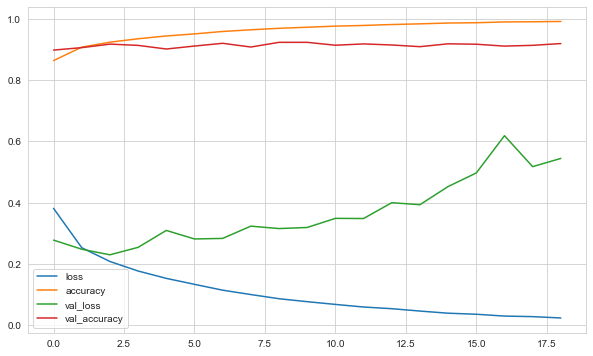

In [61]:
loss_df_model.plot();

In [62]:
loss_df_model1 = pd.DataFrame(model_r.history.history)
loss_df_model1.head()

,loss,accuracy,val_loss,val_accuracy
0,1.170,0.701,0.882,0.763
1,0.813,0.778,0.774,0.786
2,0.729,0.799,0.749,0.792
3,0.705,0.807,0.681,0.820
4,0.694,0.811,0.764,0.782


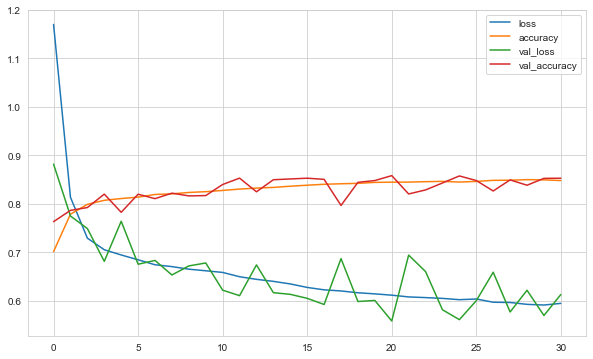

In [63]:
loss_df_model1.plot();

In [64]:
loss_df_model2 = pd.DataFrame(model_r2.history.history)
loss_df_model2.head()

,loss,accuracy,val_loss,val_accuracy
0,1.251,0.737,0.736,0.781
1,0.693,0.801,0.698,0.791
2,0.650,0.813,0.639,0.815
3,0.631,0.818,0.613,0.827
4,0.615,0.824,0.728,0.781


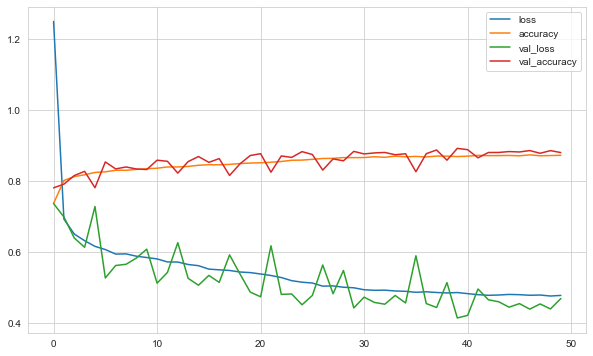

In [65]:
loss_df_model2.plot();

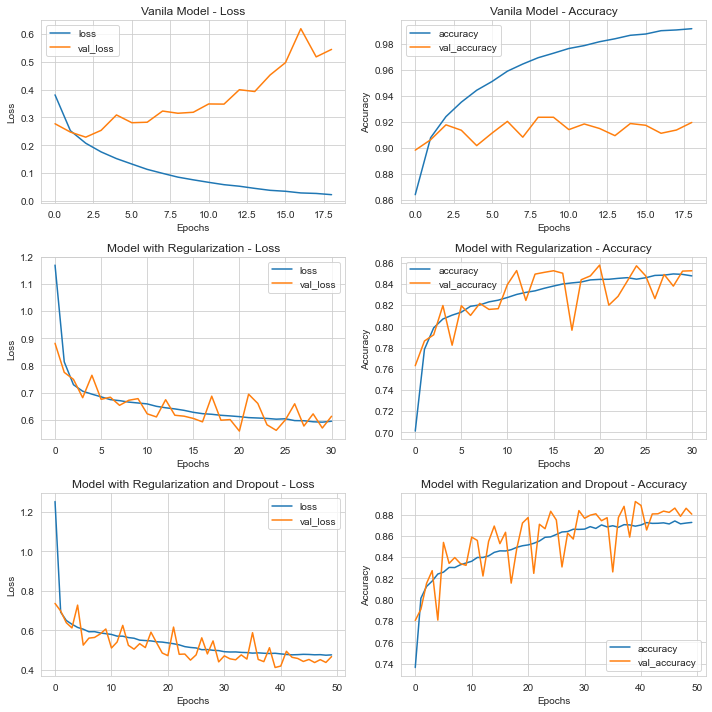

In [66]:
# Create a list of dataframes and their right  names
model_data = [(loss_df_model, "Vanila Model"),
              (loss_df_model1, "Model with Regularization"),
              (loss_df_model2, "Model with Regularization and Dropout")]

# Create subplots for each model
fig, axes = plt.subplots(len(model_data), 2, figsize=(10, 10))

for i, (model_df, model_name) in enumerate(model_data):
    # Plot loss
    model_df[['loss', 'val_loss']].plot(ax=axes[i, 0])
    axes[i, 0].set_title(f'{model_name} - Loss')
    axes[i, 0].set_xlabel('Epochs')
    axes[i, 0].set_ylabel('Loss')

    # Plot accuracy
    model_df[['accuracy', 'val_accuracy']].plot(ax=axes[i, 1])
    axes[i, 1].set_title(f'{model_name} - Accuracy')
    axes[i, 1].set_xlabel('Epochs')
    axes[i, 1].set_ylabel('Accuracy')

# Adjust layout
plt.tight_layout()
plt.show()


- from this images: 
- model with "extra layer, L2, and dropout" berforms well and no overfitting nor underfitting. 
- model with L2 has some underfitting but it works well
- vanila model has overfitting

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [67]:
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    multilabel_confusion_matrix,
)

313/313 [==============================] - 2s 5ms/step
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1000
           1       0.99      0.98      0.99      1000
           2       0.84      0.87      0.86      1000
           3       0.95      0.89      0.92      1000
           4       0.81      0.89      0.85      1000
           5       0.99      0.97      0.98      1000
           6       0.77      0.73      0.75      1000
           7       0.96      0.97      0.97      1000
           8       0.98      0.98      0.98      1000
           9       0.96      0.97      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

-------------------------------------------------------------


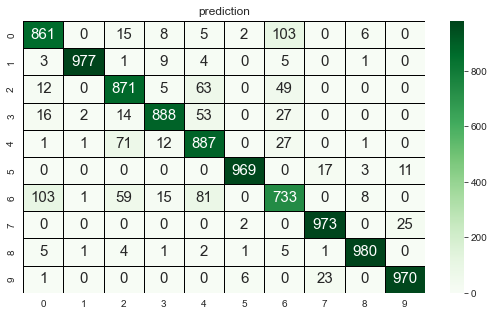

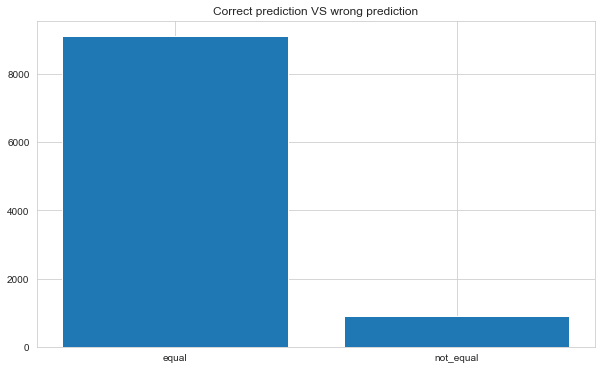

In [68]:
pred_prob = model.predict(X_test_s)
y_pred = np.argmax(pred_prob, axis=1)
print(classification_report(y_test, y_pred))
print("-------------------------------------------------------------")
plt.figure(figsize=(9, 5))
sns.heatmap(
        confusion_matrix(y_test, y_pred),
        annot=True,
        cmap="Greens",
        linewidths=0.5,
        linecolor="black",
        fmt="g",
        annot_kws={"size": 15},)
plt.title("prediction")
plt.show();
print("\n")
equal = np.equal(y_test, y_pred).sum()
not_equal= np.not_equal(y_test, y_pred).sum()
plt.bar(['equal','not_equal'] , [equal,not_equal] )
plt.title("Correct prediction VS wrong prediction")
plt.show();

# high accuracy but overfitting

313/313 [==============================] - 1s 5ms/step
              precision    recall  f1-score   support

           0       0.76      0.81      0.79      1000
           1       0.99      0.96      0.97      1000
           2       0.69      0.86      0.77      1000
           3       0.88      0.84      0.86      1000
           4       0.79      0.69      0.73      1000
           5       0.97      0.94      0.95      1000
           6       0.63      0.56      0.60      1000
           7       0.92      0.94      0.93      1000
           8       0.97      0.94      0.96      1000
           9       0.92      0.95      0.93      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000

-------------------------------------------------------------


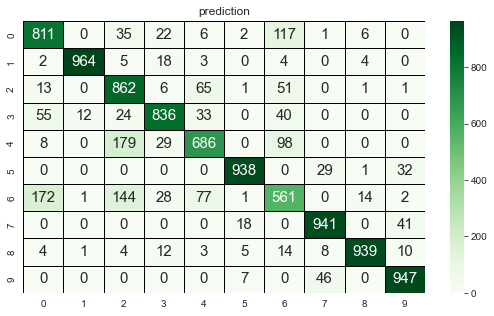

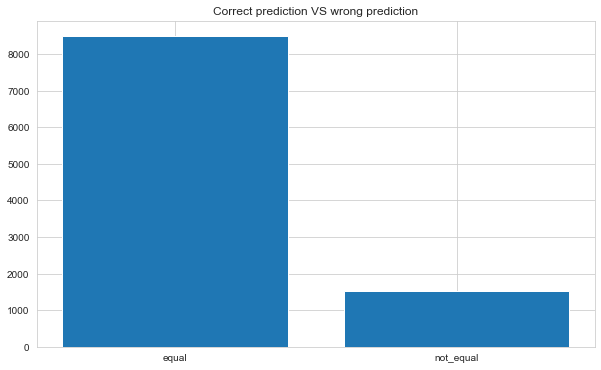

In [121]:
pred_prob1 = model_r.predict(X_test_s)
y_pred = np.argmax(pred_prob1, axis=1)
print(classification_report(y_test, y_pred))
print("-------------------------------------------------------------")
plt.figure(figsize=(9, 5))
sns.heatmap(
        confusion_matrix(y_test, y_pred),
        annot=True,
        cmap="Greens",
        linewidths=0.5,
        linecolor="black",
        fmt="g",
        annot_kws={"size": 15},)
plt.title("prediction")
plt.show();
print("\n")
equal = np.equal(y_test, y_pred).sum()
not_equal= np.not_equal(y_test, y_pred).sum()
plt.bar(['equal','not_equal'] , [equal,not_equal] )
plt.title("Correct prediction VS wrong prediction")
plt.show();

313/313 [==============================] - 5s 15ms/step
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1000
           1       0.99      0.96      0.98      1000
           2       0.79      0.85      0.82      1000
           3       0.90      0.86      0.88      1000
           4       0.80      0.80      0.80      1000
           5       0.99      0.93      0.96      1000
           6       0.67      0.67      0.67      1000
           7       0.88      0.99      0.93      1000
           8       0.99      0.94      0.97      1000
           9       0.95      0.91      0.93      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

-------------------------------------------------------------


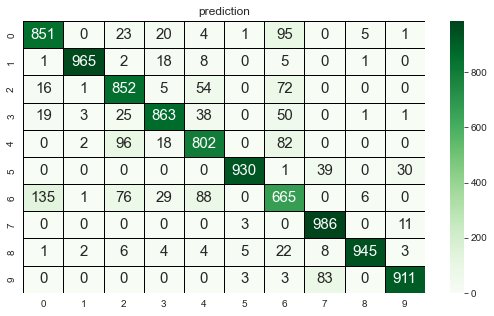

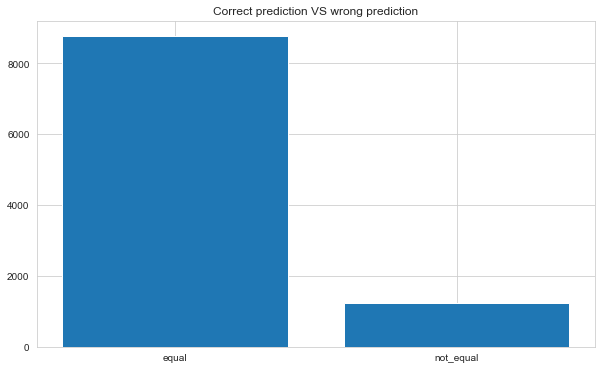

In [122]:
pred_prob2 = model_r2.predict(X_test_s)
y_pred = np.argmax(pred_prob, axis=1)
print(classification_report(y_test, y_pred))
print("-------------------------------------------------------------")
plt.figure(figsize=(9, 5))
sns.heatmap(
        confusion_matrix(y_test, y_pred),
        annot=True,
        cmap="Greens",
        linewidths=0.5,
        linecolor="black",
        fmt="g",
        annot_kws={"size": 15},)
plt.title("prediction")
plt.show();
print("\n")
equal = np.equal(y_test, y_pred).sum()
not_equal= np.not_equal(y_test, y_pred).sum()
plt.bar(['equal','not_equal'] , [equal,not_equal] )
plt.title("Correct prediction VS wrong prediction")
plt.show();

## Prediction

In [127]:
X_test_s[5]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.7529412 ],
        [0.7372549 ],
        [0.70980394],
        [0.7411765 ],
        [0.6156863 ],
        [0.64705884],
        [0.7372549 ],
        [0.6901961 ],
        [0.7019608 ],
        [0.70980394],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.05490196],
        [0.92156863],
        [0.8352941 ],
        [0.8352941 ],
        [0.8745098 ],
        [0.88235295],
        [0.8509804 ],
        [0.8392157 ],
        

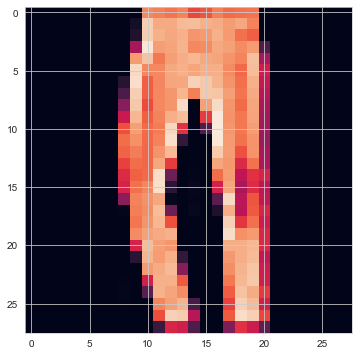

In [128]:
plt.imshow(X_test_s[5])
plt.show()

In [129]:
y_test[5]

1

In [130]:
classes[y_test[5]]

'Trouser'

In [131]:
X_predict = X_test_s[5]

In [132]:
X_test_s[5].shape

(28, 28, 1)

In [133]:
X_train_s[5].shape

(28, 28, 1)

In [134]:
y_test_c.shape

(10000, 10)

In [135]:
predicted_value = model_r2.predict(np.expand_dims(X_test_s[5], 0))
predicted_value

1/1 [==============================] - 0s 30ms/step


array([[4.7081645e-05, 9.9983931e-01, 3.5110693e-06, 3.3182863e-05,
        2.6220030e-05, 2.0040310e-05, 9.1218681e-06, 1.2757617e-07,
        2.1460703e-05, 7.4714421e-09]], dtype=float32)

In [116]:
np.argmax(predicted_value)

5

Predicted value:  Trouser 
Real value : Trouser


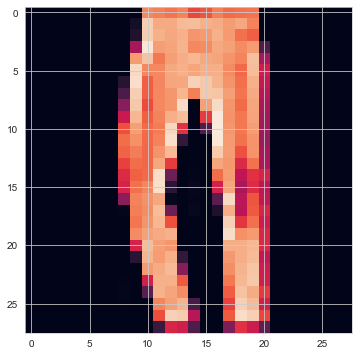

In [136]:
print('Predicted value: ', classes[np.argmax(predicted_value)],
      '\nReal value :', classes[y_test[5]])
plt.imshow(X_test_s[5]);

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___